Import library

In [1]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import glob as glob
import os
import random

In [2]:
def yolo_to_bbox(bboxes):
    xmin, ymin = bboxes[0] - bboxes[2] / 2, bboxes[1] - bboxes[3] / 2
    xmax, ymax = bboxes[0] + bboxes[2] / 2, bboxes[1] + bboxes[3] / 2
    return xmin, ymin, xmax, ymax

In [3]:
class_names = ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

def plot_object_detection(image, bboxes, labels):
    h, w, _ = image.shape
    
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo_to_bbox(box)
        
        # denormalize coordinates
        xmin = int(x1 * w)
        ymin = int(y1 * h)
        xmax = int(x2 * w)
        ymax = int(y2 * h)
        width = xmax - xmin
        height = ymax - ymin
        
        class_name = class_names[int(labels[box_num])]
        
        cv2.rectangle(
            image,
            (xmin, ymin), (xmax, ymax),
            color = colors[class_names.index(class_name)],
            thickness = 2
        )
        
        font_scale = min(1, max(3, int(w/500)))
        font_thickness = min(2, max(10,int(w/50)))
        
        p1, p2 = (int(xmin), int(ymin)), (int(xmax), int(ymax))
        
        # Text width and height
        tw, th = cv2.getTextSize(class_name, 0, fontScale = font_scale, thickness = font_thickness)[0]
        p2 = p1[0] + tw, p1[1] + -th - 10
        
        cv2.rectangle(
            image,
            p1, p2,
            color = colors[class_names.index(class_name)],
            thickness = -1
        )
        
        cv2.putText(
            image, 
            class_name,
            (xmin+1, ymin-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            font_thickness            
        )
        
    return image

In [4]:
def plot_image(image_path, label_path, num_samples):
    training_images = glob.glob(image_path)
    training_labels = glob.glob(label_path)
    training_images.sort()
    training_labels.sort()

    num_images = len(training_images)
    
    plt.figure(figsize=(15, 14))
    
    for i in range(num_samples):
        j = random.randint(0, num_images-1)
        image = cv2.imread(training_images[j])
        with open(training_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_object_detection(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.tight_layout()
    plt.show()

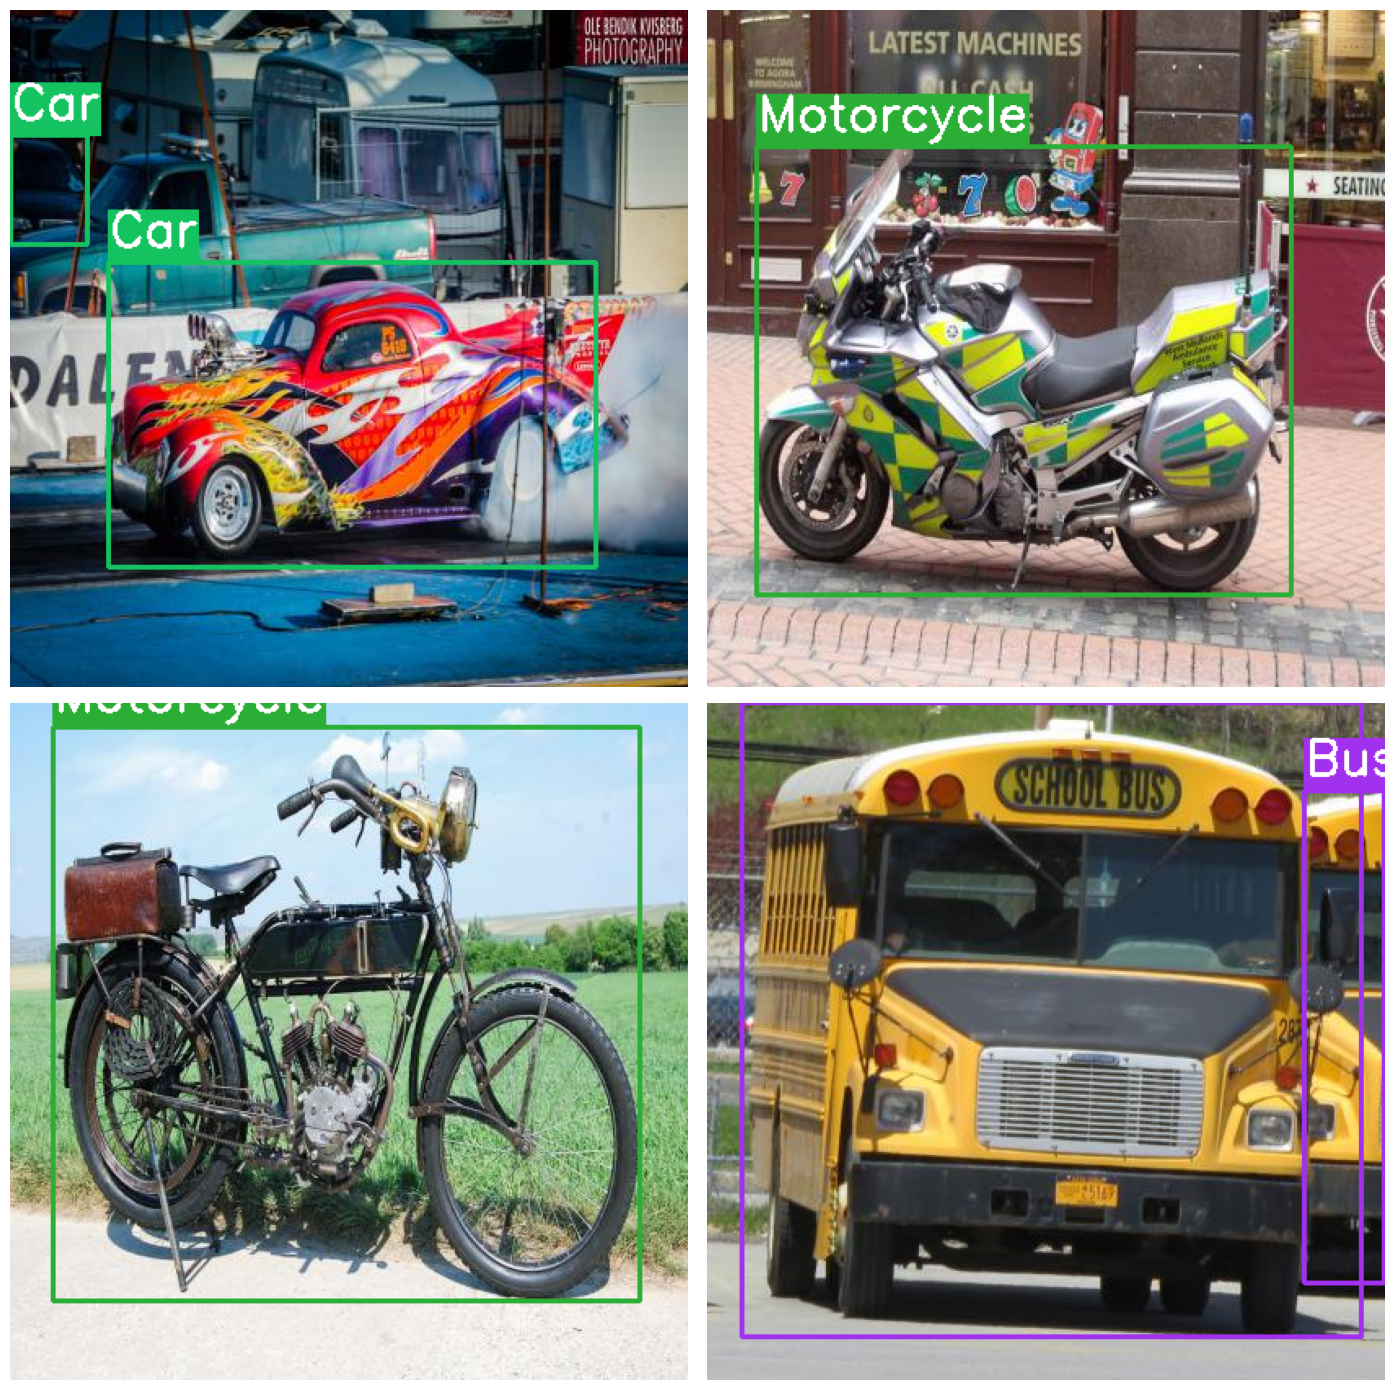

In [5]:
plot_image(
    image_path = '/kaggle/input/cars-detection/Cars Detection/train/images/*',
    label_path = '/kaggle/input/cars-detection/Cars Detection/train/labels/*',
    num_samples = 4
)

# YOLOv8

In [6]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 520.6 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 4.2 MB/s eta 0:00:0000:0100:01


In [7]:
# os.environ['WANDB_DISABLED'] = 'true'
import wandb
wandb.init(mode="disabled")

In [8]:
from ultralytics import YOLO



# Load a model
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data = '/kaggle/input/datayaml/data.yaml', epochs = 100)


100%|██████████| 6.23M/6.23M [00:00<00:00, 72.7MB/s]

Transferred 355/355 items from pretrained weights


Ultralytics YOLOv8.1.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/datayaml/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 13.7MB/s]
2024-03-15 06:44:00,003	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-15 06:44:01,020	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-15 06:44:05.454286: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 06:44:05.454422: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 06:44:05.727107: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/cars-detection/Cars Detection/train/labels... 878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 878/878 [00:04<00:00, 216.49it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cars-detection/Cars Detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cars-detection/Cars Detection/valid/labels... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:01<00:00, 180.16it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cars-detection/Cars Detection/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.34G      1.061      2.781      1.383         64        640: 100%|██████████| 55/55 [00:16<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        250        454      0.533       0.31      0.356      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.36G       1.15      2.248      1.422         32        640: 100%|██████████| 55/55 [00:11<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.93it/s]

                   all        250        454      0.422      0.344       0.36      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.34G      1.197      2.205      1.466         47        640: 100%|██████████| 55/55 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        250        454      0.382      0.384      0.335      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.34G      1.229      2.129      1.479         73        640: 100%|██████████| 55/55 [00:11<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]

                   all        250        454      0.437       0.27      0.292      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.36G       1.19      2.009      1.472         51        640: 100%|██████████| 55/55 [00:11<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]

                   all        250        454      0.563      0.296      0.355       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.36G      1.216      1.985      1.477         51        640: 100%|██████████| 55/55 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]

                   all        250        454      0.299      0.381      0.332      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.34G       1.17      1.929      1.456         61        640: 100%|██████████| 55/55 [00:11<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.01it/s]


                   all        250        454      0.555      0.346      0.417      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.35G      1.163      1.801      1.441         59        640: 100%|██████████| 55/55 [00:11<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.08it/s]


                   all        250        454      0.487      0.443      0.379      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.32G       1.11      1.691      1.404         42        640: 100%|██████████| 55/55 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.03it/s]


                   all        250        454      0.476      0.488      0.384      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.34G      1.122      1.653       1.41         38        640: 100%|██████████| 55/55 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]

                   all        250        454      0.366      0.356      0.383      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.34G      1.132      1.642      1.392         58        640: 100%|██████████| 55/55 [00:11<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        250        454      0.523       0.39       0.41      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.37G      1.112      1.633      1.405         44        640: 100%|██████████| 55/55 [00:11<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        250        454      0.378      0.446      0.437      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.36G      1.081       1.52      1.364         54        640: 100%|██████████| 55/55 [00:11<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]

                   all        250        454      0.441      0.453      0.427      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.36G      1.047       1.44      1.353         59        640: 100%|██████████| 55/55 [00:11<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]

                   all        250        454      0.669      0.395      0.483       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.34G      1.053       1.41      1.337         43        640: 100%|██████████| 55/55 [00:11<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]


                   all        250        454      0.619      0.451        0.5      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.36G      1.042      1.364      1.329         36        640: 100%|██████████| 55/55 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]

                   all        250        454      0.415      0.435      0.431      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.37G      1.023      1.335      1.331         47        640: 100%|██████████| 55/55 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]

                   all        250        454      0.555      0.425      0.482      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.34G      1.004      1.285      1.317         41        640: 100%|██████████| 55/55 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.17it/s]

                   all        250        454      0.686      0.464      0.505      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.36G      1.011      1.271      1.312         59        640: 100%|██████████| 55/55 [00:11<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]

                   all        250        454      0.534       0.47      0.439      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.24G      0.998      1.269      1.298         54        640: 100%|██████████| 55/55 [00:11<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]

                   all        250        454      0.535      0.428      0.462      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.34G     0.9675      1.181      1.288         56        640: 100%|██████████| 55/55 [00:11<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.19it/s]


                   all        250        454      0.569      0.486      0.481      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.36G      0.984      1.228      1.272         44        640: 100%|██████████| 55/55 [00:11<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]


                   all        250        454      0.597      0.439      0.498       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.33G     0.9347      1.163      1.272         62        640: 100%|██████████| 55/55 [00:11<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]


                   all        250        454      0.449      0.447      0.426      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.36G     0.9264      1.125      1.264         71        640: 100%|██████████| 55/55 [00:11<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]


                   all        250        454      0.648      0.422      0.505      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.34G      0.921       1.09      1.251         43        640: 100%|██████████| 55/55 [00:11<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        250        454       0.64      0.449      0.414      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.33G     0.9068      1.071      1.258         63        640: 100%|██████████| 55/55 [00:11<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]

                   all        250        454      0.508      0.537      0.533      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.36G     0.9129      1.064      1.267         42        640: 100%|██████████| 55/55 [00:11<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]


                   all        250        454      0.489      0.529      0.516      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.37G     0.9009      1.024       1.25         51        640: 100%|██████████| 55/55 [00:11<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        250        454       0.51      0.561      0.528      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.36G     0.8863      1.022      1.233         45        640: 100%|██████████| 55/55 [00:11<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]

                   all        250        454       0.54      0.489      0.518      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.34G      0.909      1.052      1.251         75        640: 100%|██████████| 55/55 [00:11<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.16it/s]

                   all        250        454      0.557      0.534      0.489      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.32G     0.8641     0.9977      1.219         41        640: 100%|██████████| 55/55 [00:11<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]


                   all        250        454      0.594      0.509      0.544      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.36G     0.8509     0.9469      1.201         59        640: 100%|██████████| 55/55 [00:11<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]

                   all        250        454      0.584      0.569      0.563      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.34G     0.8538      0.928      1.204         64        640: 100%|██████████| 55/55 [00:11<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]

                   all        250        454      0.529      0.489      0.483      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.36G     0.8606     0.9586      1.218         51        640: 100%|██████████| 55/55 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        250        454      0.626      0.503      0.556      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.36G     0.8626     0.9259      1.212         40        640: 100%|██████████| 55/55 [00:11<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.83it/s]

                   all        250        454      0.632      0.491      0.529      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.37G      0.843     0.9697      1.217         38        640: 100%|██████████| 55/55 [00:11<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]

                   all        250        454      0.594      0.435      0.503      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.34G     0.8385      0.946      1.205         61        640: 100%|██████████| 55/55 [00:11<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]


                   all        250        454      0.584      0.517      0.545      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.36G     0.8176     0.8854      1.181         44        640: 100%|██████████| 55/55 [00:11<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]


                   all        250        454      0.533      0.516      0.497       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.36G     0.8062     0.8612      1.177         49        640: 100%|██████████| 55/55 [00:11<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        250        454      0.621      0.524      0.529       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.36G     0.8033     0.8646      1.173         48        640: 100%|██████████| 55/55 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        250        454      0.569      0.556      0.557      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.36G     0.8049     0.8727      1.175         56        640: 100%|██████████| 55/55 [00:11<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]

                   all        250        454      0.635      0.449      0.531      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.33G     0.7927       0.85      1.165         39        640: 100%|██████████| 55/55 [00:11<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]

                   all        250        454      0.633      0.474      0.547      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.34G     0.7816     0.8207      1.163         39        640: 100%|██████████| 55/55 [00:11<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.07it/s]

                   all        250        454      0.673      0.501      0.556      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.34G     0.8006     0.8507      1.176         41        640: 100%|██████████| 55/55 [00:11<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]


                   all        250        454      0.523      0.591      0.507      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.34G     0.7735      0.801      1.149         45        640: 100%|██████████| 55/55 [00:11<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]

                   all        250        454      0.618      0.551      0.551      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.36G     0.7856     0.8262      1.158         62        640: 100%|██████████| 55/55 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        250        454      0.644      0.493      0.535      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.36G     0.7498     0.7795      1.139         47        640: 100%|██████████| 55/55 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]

                   all        250        454       0.65      0.543      0.578       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.36G     0.7458     0.7791      1.134         42        640: 100%|██████████| 55/55 [00:11<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.15it/s]

                   all        250        454       0.59      0.528      0.514      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.24G     0.7508     0.7527      1.137         58        640: 100%|██████████| 55/55 [00:11<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]


                   all        250        454      0.473      0.555      0.508      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.35G     0.7333     0.7707      1.122         36        640: 100%|██████████| 55/55 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]


                   all        250        454      0.534       0.52       0.51      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.36G     0.7363     0.7411      1.127         42        640: 100%|██████████| 55/55 [00:11<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.18it/s]


                   all        250        454      0.626      0.486      0.546      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.36G       0.71     0.7341      1.112         58        640: 100%|██████████| 55/55 [00:11<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.10it/s]

                   all        250        454        0.6      0.554      0.539      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.36G     0.7186     0.7068      1.107         52        640: 100%|██████████| 55/55 [00:11<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]


                   all        250        454      0.513      0.515      0.499       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.34G      0.717     0.7177      1.121         55        640: 100%|██████████| 55/55 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]


                   all        250        454      0.597      0.486      0.524      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.36G     0.7187     0.7211      1.108         54        640: 100%|██████████| 55/55 [00:11<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]

                   all        250        454      0.619      0.456      0.517      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.34G      0.695     0.7032      1.103         50        640: 100%|██████████| 55/55 [00:11<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]

                   all        250        454      0.571      0.475      0.506      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.36G       0.69     0.6791      1.103         47        640: 100%|██████████| 55/55 [00:11<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]


                   all        250        454      0.573      0.507       0.53      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.34G     0.7095     0.6938       1.11         39        640: 100%|██████████| 55/55 [00:11<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]

                   all        250        454      0.564      0.528      0.513      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.34G     0.6849     0.6661      1.091         56        640: 100%|██████████| 55/55 [00:11<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.10it/s]

                   all        250        454      0.553      0.585      0.571       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.37G     0.6783     0.6615      1.091         81        640: 100%|██████████| 55/55 [00:11<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]


                   all        250        454      0.521      0.595      0.576      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.36G     0.6636     0.6337      1.082         46        640: 100%|██████████| 55/55 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        250        454      0.664      0.522      0.583      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.33G     0.6482     0.6267       1.08         62        640: 100%|██████████| 55/55 [00:11<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.16it/s]


                   all        250        454      0.563        0.6       0.59      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.33G     0.6681      0.642      1.087         53        640: 100%|██████████| 55/55 [00:11<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        250        454      0.573      0.538       0.54      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.34G     0.6595     0.6418      1.088         41        640: 100%|██████████| 55/55 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        250        454      0.655      0.486      0.549      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.34G     0.6503     0.6343      1.081         50        640: 100%|██████████| 55/55 [00:11<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]


                   all        250        454      0.616      0.495      0.525      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.36G     0.6465     0.6335      1.077         79        640: 100%|██████████| 55/55 [00:11<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        250        454      0.625      0.479      0.511      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.33G     0.6329     0.5955      1.058         40        640: 100%|██████████| 55/55 [00:11<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]

                   all        250        454      0.605       0.53       0.56      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.33G      0.627     0.6165      1.064         55        640: 100%|██████████| 55/55 [00:11<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        250        454      0.557      0.516      0.541      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.36G     0.6173     0.5936      1.063         45        640: 100%|██████████| 55/55 [00:11<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]

                   all        250        454      0.567      0.552      0.544      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.36G     0.6368     0.6038      1.071         57        640: 100%|██████████| 55/55 [00:11<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]

                   all        250        454      0.596      0.513      0.547      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.36G     0.6197     0.5909      1.054         42        640: 100%|██████████| 55/55 [00:11<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]

                   all        250        454      0.581      0.557      0.554      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.36G     0.6032     0.5813      1.051         54        640: 100%|██████████| 55/55 [00:11<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]


                   all        250        454      0.588      0.562      0.572      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.36G     0.6261     0.5917      1.062         46        640: 100%|██████████| 55/55 [00:11<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.26it/s]

                   all        250        454      0.641      0.562      0.585      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.36G     0.6171     0.5773      1.052         46        640: 100%|██████████| 55/55 [00:11<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]

                   all        250        454      0.549      0.521      0.546      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.33G     0.6152     0.5702      1.047         51        640: 100%|██████████| 55/55 [00:11<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.83it/s]

                   all        250        454      0.594      0.529      0.549      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.37G     0.5978     0.5689      1.046         46        640: 100%|██████████| 55/55 [00:11<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]

                   all        250        454      0.624      0.509      0.529      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.36G     0.5748       0.55      1.031         50        640: 100%|██████████| 55/55 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]


                   all        250        454      0.591      0.504      0.542      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.33G     0.5936       0.55      1.043         52        640: 100%|██████████| 55/55 [00:11<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.22it/s]


                   all        250        454      0.603      0.528      0.548      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.36G      0.569       0.54      1.037         51        640: 100%|██████████| 55/55 [00:10<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]

                   all        250        454      0.618      0.532      0.554      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.37G     0.5623     0.5314      1.023         64        640: 100%|██████████| 55/55 [00:11<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]

                   all        250        454      0.579      0.548      0.548      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.34G     0.5752     0.5358      1.032         50        640: 100%|██████████| 55/55 [00:10<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]

                   all        250        454      0.578      0.543      0.547       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.34G     0.5683     0.5336      1.026         42        640: 100%|██████████| 55/55 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]


                   all        250        454      0.606       0.51      0.546      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.36G      0.559     0.5252      1.032         60        640: 100%|██████████| 55/55 [00:11<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]


                   all        250        454      0.671      0.496      0.543       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.34G     0.5512     0.5085      1.009         55        640: 100%|██████████| 55/55 [00:11<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  4.00it/s]

                   all        250        454      0.638      0.479      0.529      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.36G     0.5497     0.4976      1.017         49        640: 100%|██████████| 55/55 [00:11<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]


                   all        250        454      0.536      0.551      0.537      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.33G     0.5421     0.4967      1.015         42        640: 100%|██████████| 55/55 [00:11<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]

                   all        250        454      0.575      0.531       0.54      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.36G     0.5467     0.5011      1.011         35        640: 100%|██████████| 55/55 [00:11<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]


                   all        250        454      0.604      0.513      0.546      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.34G     0.5307     0.4866      1.014         55        640: 100%|██████████| 55/55 [00:10<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.17it/s]


                   all        250        454      0.594      0.526      0.544      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.37G     0.5335     0.4871      1.013         51        640: 100%|██████████| 55/55 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]

                   all        250        454      0.604      0.561      0.548      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.33G     0.5416     0.4958      1.009         54        640: 100%|██████████| 55/55 [00:11<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]

                   all        250        454      0.614      0.516      0.541      0.401


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.32G     0.4594     0.3913     0.9433         25        640: 100%|██████████| 55/55 [00:12<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]


                   all        250        454      0.571      0.554      0.528      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.32G     0.4528     0.3765     0.9445         19        640: 100%|██████████| 55/55 [00:10<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]

                   all        250        454      0.615      0.507      0.555      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.34G     0.4371     0.3589     0.9452         26        640: 100%|██████████| 55/55 [00:10<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]

                   all        250        454      0.652      0.516      0.557      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.34G      0.426     0.3409     0.9236         26        640: 100%|██████████| 55/55 [00:10<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]

                   all        250        454      0.632       0.49      0.557      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.33G     0.4284     0.3492     0.9326         24        640: 100%|██████████| 55/55 [00:10<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]

                   all        250        454      0.627      0.508      0.564      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.33G     0.4244     0.3521     0.9342         23        640: 100%|██████████| 55/55 [00:10<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.25it/s]

                   all        250        454      0.652      0.481       0.56      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.32G     0.4172     0.3384     0.9251         20        640: 100%|██████████| 55/55 [00:10<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.37it/s]

                   all        250        454      0.603      0.525      0.557      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.33G     0.4135     0.3409     0.9213         27        640: 100%|██████████| 55/55 [00:10<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]


                   all        250        454      0.653      0.504       0.56      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.32G     0.4044     0.3359     0.9245         20        640: 100%|██████████| 55/55 [00:10<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]

                   all        250        454      0.555      0.566      0.562      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.33G     0.4068     0.3323      0.922         21        640: 100%|██████████| 55/55 [00:10<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]

                   all        250        454      0.555      0.573      0.567      0.425



100 epochs completed in 0.399 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


                   all        250        454      0.567        0.6       0.59       0.43
             Ambulance        250         64      0.579      0.875      0.839      0.652
                   Bus        250         46      0.637      0.696      0.728      0.568
                   Car        250        238      0.584      0.378       0.44      0.306
            Motorcycle        250         46      0.497      0.652      0.566       0.33
                 Truck        250         60      0.537        0.4      0.379      0.293
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train


# Model Evaluation

In [9]:
metrics = model.val()

Ultralytics YOLOv8.1.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cars-detection/Cars Detection/valid/labels... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<00:00, 454.89it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cars-detection/Cars Detection/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.23it/s]


                   all        250        454      0.562        0.6       0.59       0.43
             Ambulance        250         64      0.579      0.875      0.838      0.657
                   Bus        250         46      0.635      0.696      0.728      0.568
                   Car        250        238      0.583      0.378      0.441      0.306
            Motorcycle        250         46       0.48      0.652      0.565       0.33
                 Truck        250         60      0.536        0.4      0.379      0.291
Speed: 0.3ms preprocess, 4.8ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train2


# Predict Images

In [41]:
trained_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

**Truck Detection**

In [58]:
im1 = cv2.imread('/kaggle/input/cars-detection/Cars Detection/test/images/4ecafc9a0bae8003_jpg.rf.2UbsFgyK4QxCrSNix6wM.jpg')
results = trained_model.predict(source=im1, classes=4, save=True)


0: 640x640 2 Trucks, 13.9ms
Speed: 4.0ms preprocess, 13.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


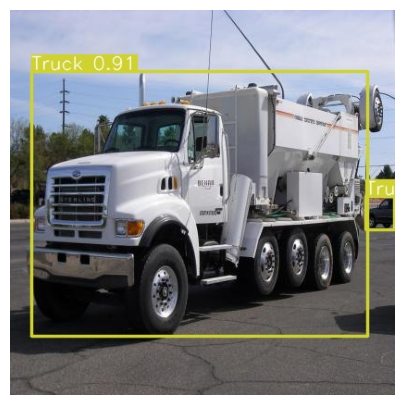

In [59]:
img_path = '/kaggle/working/runs/detect/predict3/image0.jpg'
img = plt.imread(img_path)

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis(False)
plt.show()

**Ambulance Detection**

In [46]:
im1 = cv2.imread('/kaggle/input/cars-detection/Cars Detection/test/images/2c21c734126f9f69_jpg.rf.9G8Ajct2ynuOcQoTES9z.jpg')
results = trained_model.predict(source=im1, classes=0, save=True)


0: 640x640 1 Ambulance, 9.9ms
Speed: 3.1ms preprocess, 9.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


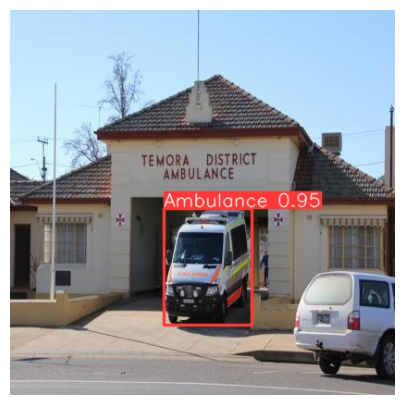

In [47]:
img_path = '/kaggle/working/runs/detect/predict/image0.jpg'
img = plt.imread(img_path)

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis(False)
plt.show()

# Predict Video

**Truck Video**

In [48]:
import io 
from IPython.display import HTML
from base64 import b64encode
def show_video(file_name, width=640):
  # show resulting deepsort video
  mp4 = open(file_name,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width="{0}" controls>
        <source src="{1}" type="video/mp4">
  </video>
  """.format(width, data_url))

In [54]:
vid1 = '/kaggle/input/test-videos/test_video2.mp4'
results = trained_model.predict(source=vid1, classes=4, conf=0.7, save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/922) /kaggle/input/test-videos/test_video2.mp4: 384x640 (no detections), 11.4ms
video 1/1 (frame 2/922) /kaggle/input/test-videos/test_video2.mp4: 384x640 (no detections), 8.6ms
video 1/1 (frame 3/922) /kaggle/input/test-videos/test_video2.mp4: 384x640 (no detections), 8.2ms
video 1/1 (frame 4/922) /kaggle/input/test-videos/test_video2.mp4: 384x640 (no detections), 9.1ms
video 1/1 (frame 5/922) /kaggle/input/test-videos/test_video2.m

Show video

In [1]:
# # Convert avi to mp4
# !ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/predict3/test_video2.avi output1.mp4

# # output object tracking video
# path_output = "output1.mp4"
# show_video(path_output, width=640)

**Ambulance Video**

In [56]:
vid1 = '/kaggle/input/test-videos/test_video1.mp4'
results = trained_model.predict(source=vid1, classes=0, conf=0.7, save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/415) /kaggle/input/test-videos/test_video1.mp4: 640x384 (no detections), 13.8ms
video 1/1 (frame 2/415) /kaggle/input/test-videos/test_video1.mp4: 640x384 (no detections), 10.2ms
video 1/1 (frame 3/415) /kaggle/input/test-videos/test_video1.mp4: 640x384 (no detections), 8.8ms
video 1/1 (frame 4/415) /kaggle/input/test-videos/test_video1.mp4: 640x384 (no detections), 9.1ms
video 1/1 (frame 5/415) /kaggle/input/test-videos/test_video1.

Show video

In [2]:
# # Convert avi to mp4
# !ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/predict3/test_video1.avi output2.mp4

# # output object tracking video
# path_output = "output2.mp4"
# show_video(path_output, width=360)